In [2]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

# DATASET ON HOUSEHOLD

In [3]:

file_url = r"C:\Users\Lenovo\Documents\INDE DATA\HOUSEHOLDCEREALNSS682.csv"

data= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
data = data.copy()
data.head(2)

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Round_Centre_code,FSU_Serial_no,Round,Sch_no,Sample,Sector,State_region,District,Stratum,Sub_Stratum_No,Schedule_type,Sub_Round,Sub_Sample,FOD_Sub_Region,Hamlet_Group_Sub_Stratum_No,Second_Stage_Stratum_No,Sample_hhld_no,Level,Filler,HH_Size,NIC_2008,NCO_2004,HH_Type,Religion,Social_Group,whether_Land_owned,Type_of_land_owned,Land_owned,Land_Leased_in,otherwise_Land_possessed,Land_Leased_out,Land_total_possessed,During_july10_june11_cultivated,During_july10_june11_irrigated,Special_Characters_for_Ok_Stamp,Blank,NSS,NSC,MLT,HHID,State_code,District_code,HH_Type_code,Combined_multiplier,Subsample_multiplier
0,2,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,2,0,5,Tea/coffee shops,Directors and Chief Executives,2.0,Christianity,Scheduled Tribes,Yes,Homestead and other land,136,,,,136,62,,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,Non-agriculture,"324,08","648,16"
1,2,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,2,2,0,2,Manufacture of country liquor,Directors and Chief Executives,2.0,Christianity,Scheduled Tribes,Yes,Homestead and other land,66,,,,66,45,,NaN,NaN,2,4,64816,715581202,MEGHALAYA,West Garo Hills,Non-agriculture,"324,08","648,16"


In [4]:
data.shape

(101662, 45)

In [5]:
data.columns

Index(['Round_Centre_code', 'FSU_Serial_no', 'Round', 'Sch_no', 'Sample',
       'Sector', 'State_region', 'District', 'Stratum', 'Sub_Stratum_No',
       'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region',
       'Hamlet_Group_Sub_Stratum_No', 'Second_Stage_Stratum_No',
       'Sample_hhld_no', 'Level', 'Filler', 'HH_Size', 'NIC_2008', 'NCO_2004',
       'HH_Type', 'Religion', 'Social_Group', 'whether_Land_owned',
       'Type_of_land_owned', 'Land_owned', 'Land_Leased_in',
       'otherwise_Land_possessed', 'Land_Leased_out', 'Land_total_possessed',
       'During_july10_june11_cultivated', 'During_july10_june11_irrigated',
       'Special_Characters_for_Ok_Stamp', 'Blank', 'NSS', 'NSC', 'MLT', 'HHID',
       'State_code', 'District_code', 'HH_Type_code', 'Combined_multiplier',
       'Subsample_multiplier'],
      dtype='object')

In [11]:
data=data[['HHID', 'Sector', 'HH_Size', 
        'Religion', 'Social_Group', 'whether_Land_owned', 
       'State_code', 'HH_Type_code']]
data.head()

,HHID,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,HH_Type_code
0,715581201,rural,5,Christianity,Scheduled Tribes,Yes,MEGHALAYA,Non-agriculture
1,715581202,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,Non-agriculture
2,715581203,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,Non-agriculture
3,715581204,rural,1,Islam,Scheduled Tribes,Yes,MEGHALAYA,Non-agriculture
4,715581301,rural,6,Christianity,Scheduled Tribes,Yes,MEGHALAYA,Casual labour in : Agriculture


In [180]:
data.shape

(101662, 8)

In [181]:
data.isna().sum()

HHID                   0
Sector                 0
HH_Size                0
Religion               3
Social_Group          14
whether_Land_owned    10
State_code             0
HH_Type_code           0
dtype: int64

In [182]:
data = data.dropna()

In [183]:
data.duplicated().any()

False

In [185]:
data.describe()

,HHID,HH_Size
count,1.016360e+05,101636.000000
mean,6.265099e+08,4.573694
std,1.480073e+08,2.247387
min,4.100011e+08,1.000000
25%,4.652713e+08,3.000000
50%,7.179322e+08,4.000000
75%,7.537422e+08,6.000000
max,7.999823e+08,39.000000


<Figure size 720x432 with 0 Axes>

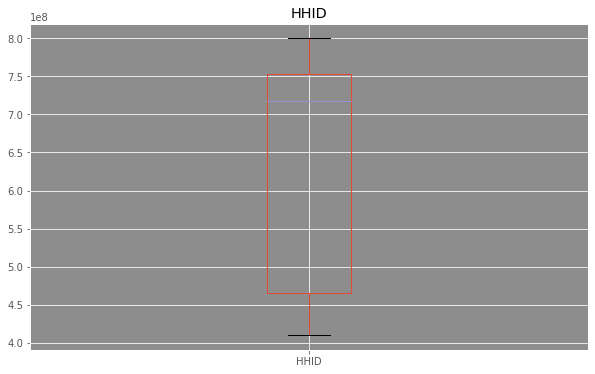

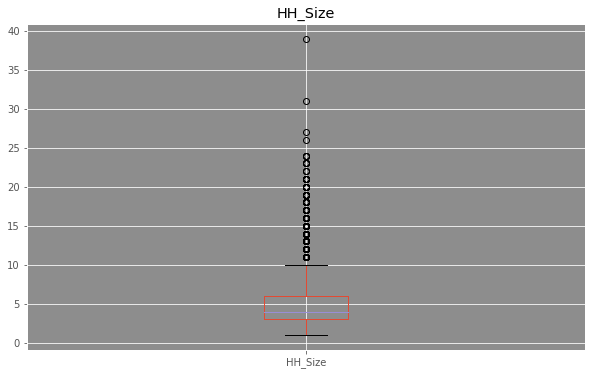

In [184]:
#Check Outliers
num_df = data.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [187]:
#We can see there are some outliers in Household size so we check these rows to knows how many is there
data[(data['HH_Size'] >20)].shape




(26, 8)

In [189]:
#there is only 26 family on 83600: so we decide to drop them  ( but after concat other dataset)
data = data.drop(data[data['HH_Size'] >20].index)



In [190]:
data.shape

(101610, 8)

In [191]:
##Exporting File
file_url = r'C:\Users\Lenovo\Documents\INDE DATA\HOUSEHOLDNSS68CLEAN.csv'
data.to_csv(file_url,index = False)

## descriptive analytic on household

In [207]:
data ['Social_Group'].value_counts()

Other Backward Classes    39899
Others                    32399
Scheduled Castes          15691
Scheduled Tribes          13621
Name: Social_Group, dtype: int64

<AxesSubplot:>

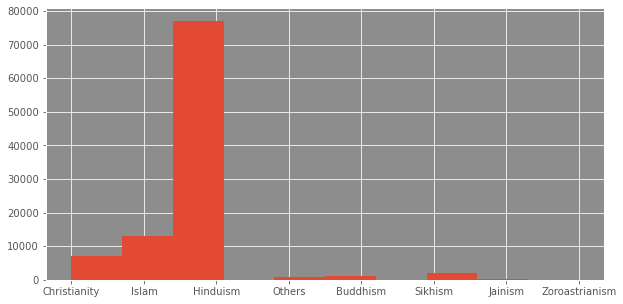

In [211]:

data ['Religion'].hist()


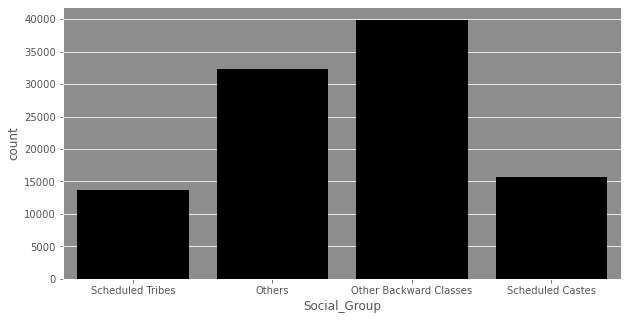

In [210]:
sns.countplot(x='Social_Group', data=data, color='black')
plt.show()

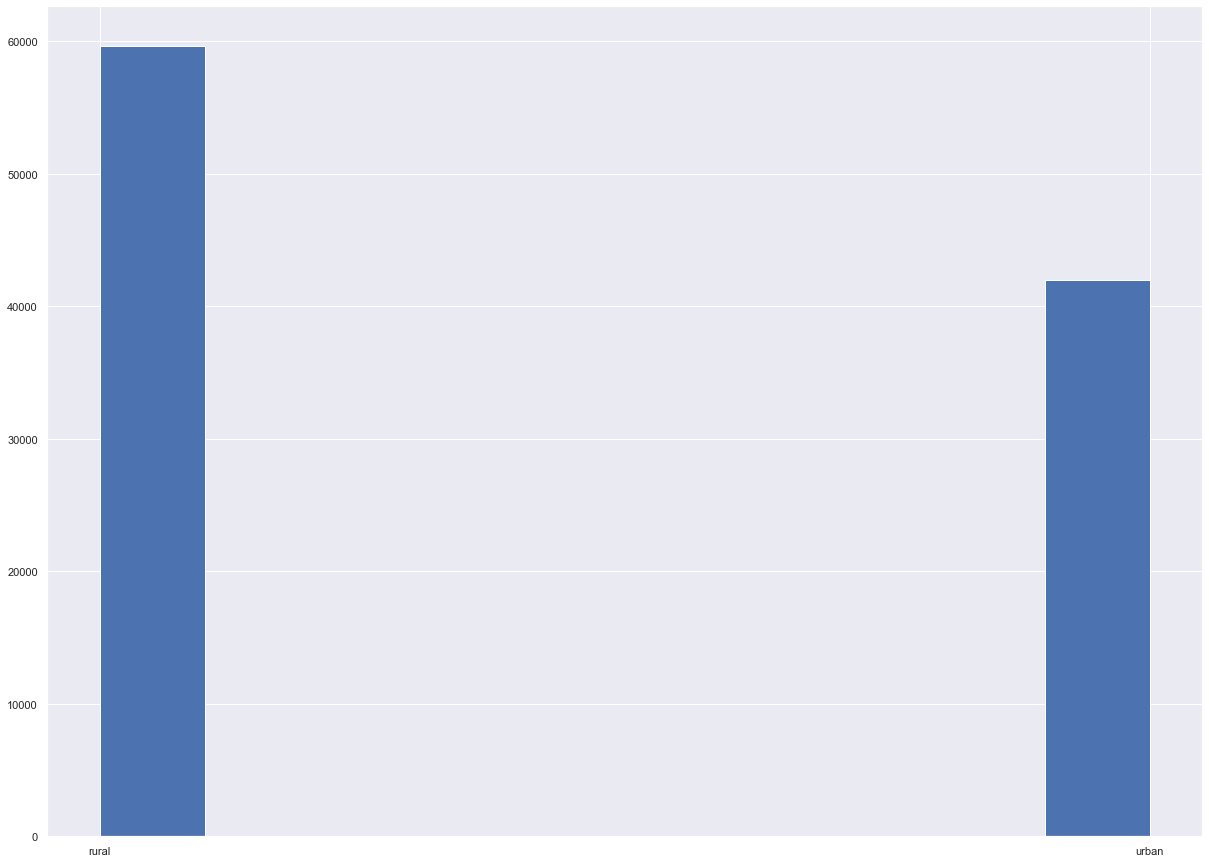

In [248]:
data ['Sector'].hist()
plt.show()

In [214]:
data_group = data.groupby(['Religion']).mean()
data_group 


,HHID,HH_Size
Religion,,
Buddhism,6.454728e+08,4.360146
Christianity,6.148756e+08,4.710567
Hinduism,6.279411e+08,4.435115
Islam,6.150414e+08,5.234649
Jainism,5.045909e+08,4.478261
Others,6.461468e+08,4.869748
Sikhism,6.866876e+08,4.833333
Zoroastrianism,5.477278e+08,4.333333


In [215]:
data_group = data.groupby(['Social_Group']).mean()
data_group 



,HHID,HH_Size
Social_Group,,
Other Backward Classes,6.269403e+08,4.602772
Others,6.005104e+08,4.457885
Scheduled Castes,6.483669e+08,4.535148
Scheduled Tribes,6.618194e+08,4.772337


In [219]:

data_group = data.groupby(['Religion','Social_Group']).mean()
data_group

HHID   HH_Size
Religion       Social_Group                                  
Buddhism       Other Backward Classes  7.043219e+08  4.705882
               Others                  6.929916e+08  4.722222
               Scheduled Castes        5.648183e+08  4.443590
               Scheduled Tribes        6.890063e+08  4.242475
Christianity   Other Backward Classes  5.792670e+08  3.718009
               Others                  5.974059e+08  3.652941
               Scheduled Castes        6.053287e+08  3.815000
               Scheduled Tribes        6.248220e+08  5.129271
Hinduism       Other Backward Classes  6.310152e+08  4.499024
               Others                  5.937837e+08  4.274020
               Scheduled Castes        6.483370e+08  4.521520
               Scheduled Tribes        6.873789e+08  4.495692
Islam          Other Backward Classes  6.097627e+08  5.299534
               Others                  6.164117e+08  5.161590
               Scheduled Castes        6.015897e+08  5.564286
               Scheduled Tribes        6.597954e+08  5.358238
Jainism        Other Backward Classes  5.329476e+08  3.814815
               Others                  4.938203e+08  4.552817
               Scheduled Castes        7.788844e+08  4.142857
               Scheduled Tribes        5.978839e+08  4.250000
Others         Other Backward Classes  6.043699e+08  4.842105
               Others                  5.814037e+08  4.683333
               Scheduled Castes        5.979682e+08  4.535714
               Scheduled Tribes        6.594750e+08  4.901333
Sikhism        Other Backward Classes  6.555410e+08  4.918567
               Others                  6.727485e+08  4.771639
               Scheduled Castes        7.275204e+08  4.913540
               Scheduled Tribes        6.536224e+08  4.000000
Zoroastrianism Others                  4.246311e+08  3.500000
               Scheduled Castes        7.939212e+08  6.000000

<AxesSubplot:xlabel='Religion', ylabel='State_code'>

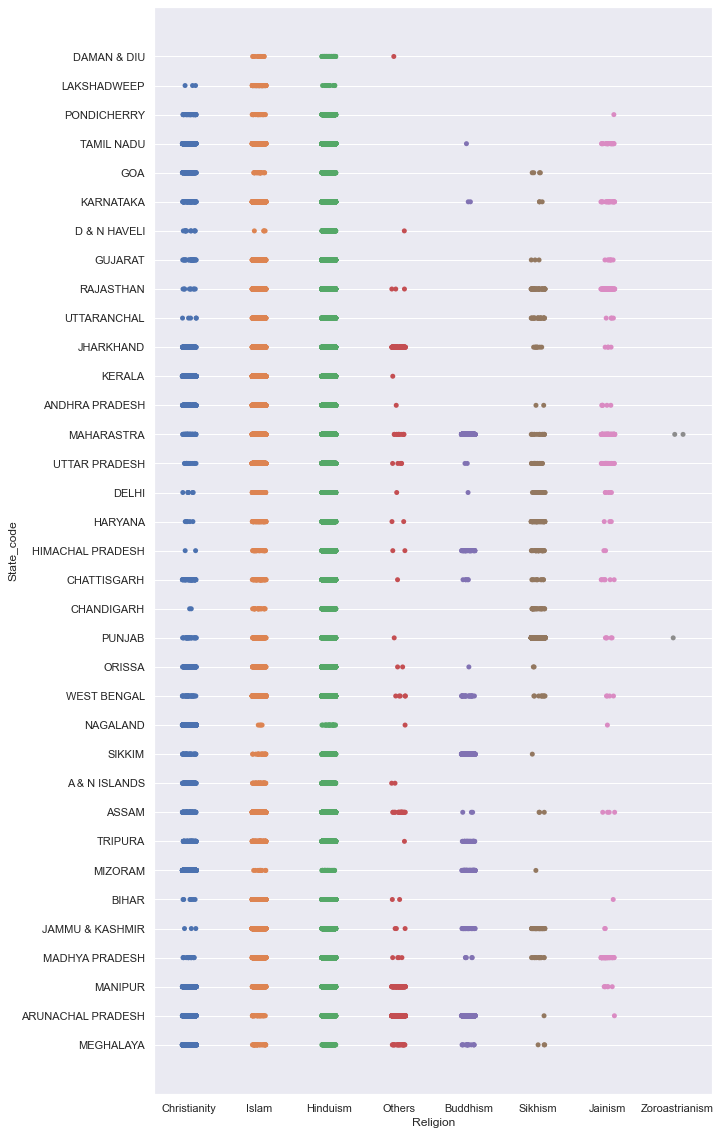

In [257]:

from matplotlib import pyplot as plt
import seaborn as sns

fig_dims = (10, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(data=data, x='Religion', y='State_code', ax=ax)



<AxesSubplot:xlabel='Social_Group', ylabel='State_code'>

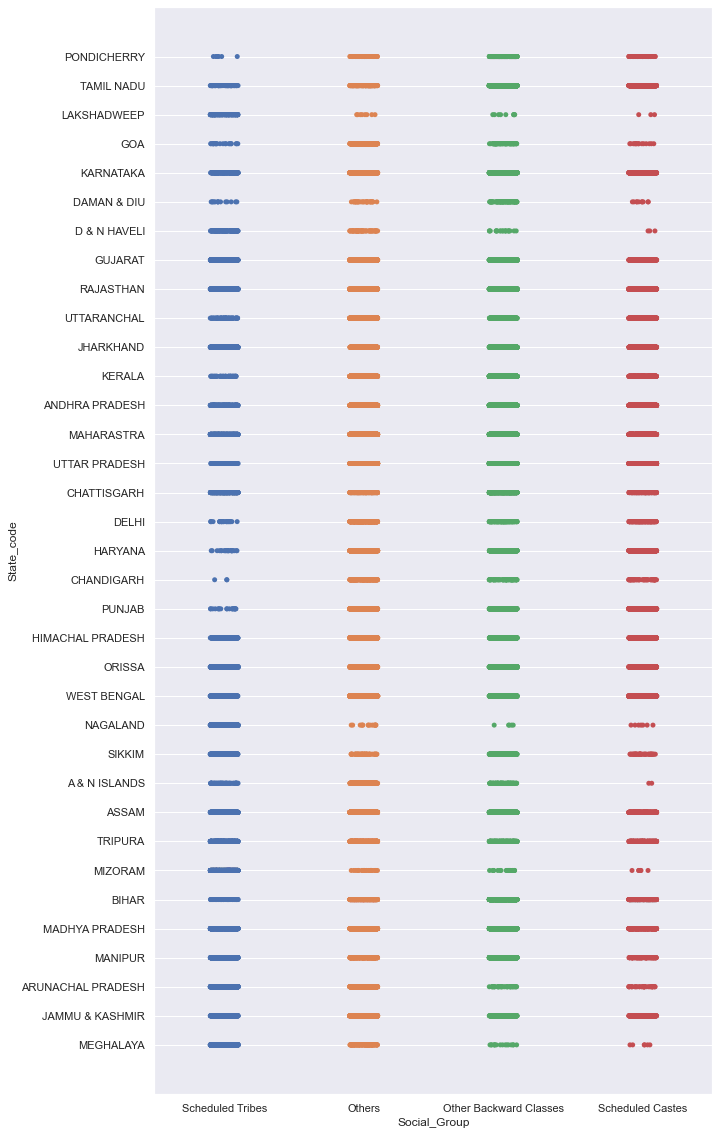

In [258]:

from matplotlib import pyplot as plt
import seaborn as sns

fig_dims = (10, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(data=data, x='Social_Group', y='State_code', ax=ax)



<AxesSubplot:>

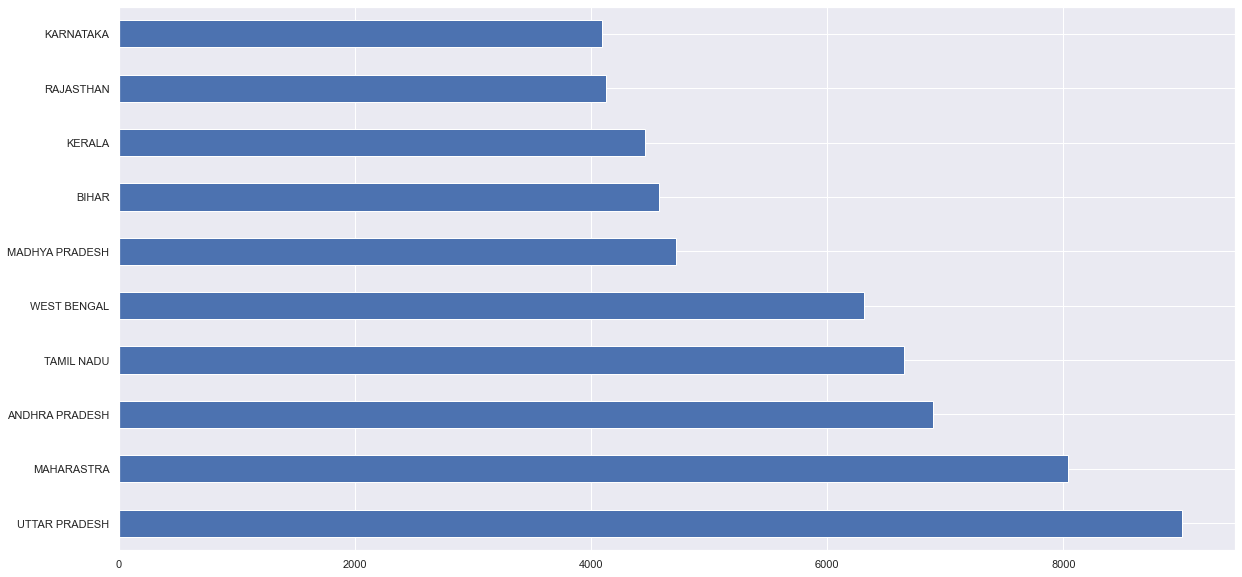

In [241]:
data['State_code'].value_counts().head(10).plot(kind='barh', figsize=(20,10))


In [232]:

fig, ax = plt.subplots()


plt.scatter(data=data, x='Social_Group', y='State_code', cmap='viridis')


sns.barplot( x='Religion', y='State_code', ax=ax, data=data)


sns.catplot(data=data, x='Religion', y='State_code' )

NameError: name 'figure' is not defined

# DATASET ON ALIMENTATION

In [33]:

file_url = r"C:\Users\Lenovo\Documents\INDE DATA\CEREALNSS68.csv"

cereal= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
cereal = cereal.copy()
cereal.head(3)

,Round_Centre_code,FSU_Serial_no,Round,Sch_no,Sample,Sector,State_Region,District,Stratum,Sub_Stratum_No,Schedule_type,Sub_Round,Sub_Sample,FOD_Sub_Region,Hamlet_Group_Sub_Stratum_No,Second_Stage_Stratum_No,Sample_Hhld_No,Level,Filler,Item_Code,Home_Produce_Quantity,Home_Produce_Value,Total_Consumption_Quantity,Total_Consumption_Value,Source_Code,Special_Characters_for_Ok_Stamp,Blank,NSS,NSC,MLT,HHID,State_Code,District_code,Combined_multiplier,Subsample_multiplier
0,9,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,5,0,Rice-PDS(Kg),,,30000,420,only purchase,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,"324,08","648,16"
1,10,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,5,0,Rice-other sources(Kg),,,15000,255,only purchase,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,"324,08","648,16"
2,11,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,5,0,Muri(Kg),,,300,15,only purchase,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,"324,08","648,16"


In [21]:
cereal.shape

(5763152, 35)

In [34]:
cereal.columns

Index(['Round_Centre_code', 'FSU_Serial_no', 'Round', 'Sch_no', 'Sample',
       'Sector', 'State_Region', 'District', 'Stratum', 'Sub_Stratum_No',
       'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region',
       'Hamlet_Group_Sub_Stratum_No', 'Second_Stage_Stratum_No',
       'Sample_Hhld_No', 'Level', 'Filler', 'Item_Code',
       'Home_Produce_Quantity', 'Home_Produce_Value',
       'Total_Consumption_Quantity', 'Total_Consumption_Value', 'Source_Code',
       'Special_Characters_for_Ok_Stamp', 'Blank', 'NSS', 'NSC', 'MLT', 'HHID',
       'State_Code', 'District_code', 'Combined_multiplier',
       'Subsample_multiplier'],
      dtype='object')

In [35]:
cereal=cereal[['HHID', 'Item_Code',
       'Total_Consumption_Quantity', 'Total_Consumption_Value', 'Source_Code'
        ]]

In [36]:
cereal

,HHID,Item_Code,Total_Consumption_Quantity,Total_Consumption_Value,Source_Code
0,715581201,Rice-PDS(Kg),30000,420,only purchase
1,715581201,Rice-other sources(Kg),15000,255,only purchase
2,715581201,Muri(Kg),300,15,only purchase
3,715581201,bread(bakery)(Kg),1200,60,only purchase
4,715581201,Cereal(s.t),46500,750,NaN
...,...,...,...,...,...
5763147,454191204,electricity (std. unit),275,200,NaN
5763148,454191204,matches (box),4,4,only purchase
5763149,454191204,LPG[excl. conveyance],9466,255,only purchase
5763150,454191204,Candle (no.),4,20,only purchase


In [25]:
cereal['Item_Code'].unique()

array(['Rice-PDS(Kg)', 'Rice-other sources(Kg)', 'Muri(Kg)',
       'bread(bakery)(Kg)', 'Cereal(s.t)',
       'Cereal Substitute : tapioca etc.', 'masur(Kg)',
       'other pulse products(Kg)', 'Pulses and Pulse Products(s.t)',
       'milk : liquid(litre)', 'Milk & Milk Products : s.t (160-167)',
       'salt', 'sugar - PDS', 'sugar - other sources',
       'salt & sugar : s.t(170-175)', 'mustard oil(Kg)',
       'edible oil  : others', 'edible oil  : s.t.(180-185)', 'eggs(no)',
       'fish, prawn(Kg)', 'beef / buffalo meat(Kg)', 'pork(Kg)',
       'chicken(Kg)', 'Egg,Fish & meat : s.t (190-196)', 'potato(Kg)',
       'onion(Kg)', 'brinjal(Kg)', 'palak/other leafy vegetables(Kg)',
       'green chillies(Kg)', 'gourd, pumpkin(Kg)', 'beans, barbati(Kg)',
       'other vegetables(Kg)', 'vegetables  : s.t (Kg) (200-217)',
       'banana (no.)', 'coconut(no.)', 'guava(Kg)', 'pears/nashpati(Kg)',
       'fruits(fresh) : s.t.(220-238)', 'other nuts(Kg)',
       'fruits (dry) : s.t. (240-24

In [116]:
#create a filter to have less item, I choose to keem, the sub total s.t
#except for egg, fish, meat, because there is cultural/political issue with non vegetarien food.
#will keep the s.t. of this one because it indicates non-vegetariens
#ecept for intoicants: a will rename this categoie alcool and delete ganga ( concern only 122 household)
#I will keep only ganja (gm), toddy (litre), country liquor (litre), beer (litre), foreign/ refined liquor or wine (litre)
#and delete other intoxicants and the total intoxicants : s.t.(320-325)


#i delete fuel and light because it is not alimentation

#So first I will add s.t. to the following item, to use them in my filter s.t
food=cereal




In [129]:
food

,HHID,Item_Code,Total_Consumption_Quantity,Total_Consumption_Value,Source_Code
0,715581201,Rice-PDS(Kg),30000,420,only purchase
1,715581201,Rice-other sources(Kg),15000,255,only purchase
2,715581201,Muri(Kg),300,15,only purchase
3,715581201,bread(bakery)(Kg),1200,60,only purchase
4,715581201,Cereal(s.t),46500,750,NaN
...,...,...,...,...,...
5763147,454191204,electricity (std. unit),275,200,NaN
5763148,454191204,matches (box),4,4,only purchase
5763149,454191204,LPG[excl. conveyance],9466,255,only purchase
5763150,454191204,Candle (no.),4,20,only purchase


In [130]:
food['Item_Code'].unique()

array(['Rice-PDS(Kg)', 'Rice-other sources(Kg)', 'Muri(Kg)',
       'bread(bakery)(Kg)', 'Cereal(s.t)',
       'Cereal Substitute : tapioca etc.', 'masur(Kg)',
       'other pulse products(Kg)', 'Pulses and Pulse Products(s.t)',
       'milk : liquid(litre)', 'Milk & Milk Products : s.t (160-167)',
       'salt', 'sugar - PDS', 'sugar - other sources',
       'salt & sugar : s.t(170-175)', 'mustard oil(Kg)',
       'edible oil  : others', 'edible oil  : s.t.(180-185)',
       'eggs(no) s.t', 'fish, prawn(Kg) s.t',
       'beef / buffalo meat(Kg) s.t', 'pork(Kg) s.t', 'chicken(Kg) s.t',
       'Egg,Fish & meat : s.t (190-196)', 'potato(Kg)', 'onion(Kg)',
       'brinjal(Kg)', 'palak/other leafy vegetables(Kg)',
       'green chillies(Kg)', 'gourd, pumpkin(Kg)', 'beans, barbati(Kg)',
       'other vegetables(Kg)', 'vegetables  : s.t (Kg) (200-217)',
       'banana (no.)', 'coconut(no.)', 'guava(Kg)', 'pears/nashpati(Kg)',
       'fruits(fresh) : s.t.(220-238)', 'other nuts(Kg)',
       '

In [156]:
food['Item_Code'].replace({'ganja (gm)': 'ganja (gm) s.t',
'toddy (litre)': 'toddy (l.) s.t', 'country liquor (litre)': 'country liquor (l.) s.t', 
'beer (litre)':'beer (l.) s.t' , 'foreign/ refined liquor or wine (litre)': 'foreign/ refined liquor or wine (l.) s.t', 
                          
                           
'eggs(no)': 'eggs(no) s.t',
'fish, prawn(Kg)': 'fish, prawn(Kg) s.t',
'goat meat /mutton(Kg)': 'goat meat /mutton(Kg) s.t',
'beef / buffalo meat(Kg)': 'beef / buffalo meat(Kg) s.t',
'pork(Kg)': 'pork(Kg) s.t',
'chicken(Kg)': 'chicken(Kg) s.t'}, inplace=True)


In [157]:
food['Item_Code'].unique()

array(['Rice-PDS(Kg)', 'Rice-other sources(Kg)', 'Muri(Kg)',
       'bread(bakery)(Kg)', 'Cereal(s.t)',
       'Cereal Substitute : tapioca etc.', 'masur(Kg)',
       'other pulse products(Kg)', 'Pulses and Pulse Products(s.t)',
       'milk : liquid(litre)', 'Milk & Milk Products : s.t (160-167)',
       'salt', 'sugar - PDS', 'sugar - other sources',
       'salt & sugar : s.t(170-175)', 'mustard oil(Kg)',
       'edible oil  : others', 'edible oil  : s.t.(180-185)',
       'eggs(no) s.t', 'fish, prawn(Kg) s.t',
       'beef / buffalo meat(Kg) s.t', 'pork(Kg) s.t', 'chicken(Kg) s.t',
       'Egg,Fish & meat : s.t (190-196)', 'potato(Kg)', 'onion(Kg)',
       'brinjal(Kg)', 'palak/other leafy vegetables(Kg)',
       'green chillies(Kg)', 'gourd, pumpkin(Kg)', 'beans, barbati(Kg)',
       'other vegetables(Kg)', 'vegetables  : s.t (Kg) (200-217)',
       'banana (no.)', 'coconut(no.)', 'guava(Kg)', 'pears/nashpati(Kg)',
       'fruits(fresh) : s.t.(220-238)', 'other nuts(Kg)',
       '

In [158]:
filter = food['Item_Code'].str.contains('s.t')
filter

0          False
1          False
2          False
3          False
4           True
           ...  
5763147    False
5763148    False
5763149    False
5763150    False
5763151     True
Name: Item_Code, Length: 5763152, dtype: bool

In [159]:
foodfilter = food[filter]
foodfilter['Item_Code'].value_counts()

fuel and light : s.t. (330-345)             101515
Cereal(s.t)                                  99895
salt & sugar : s.t(170-175)                  99875
vegetables  : s.t (Kg) (200-217)             99698
spices : s.t  (250-261)                      99452
edible oil  : s.t.(180-185)                  99261
beverages : s.t (270-277)                    98703
Pulses and Pulse Products(s.t)               98537
packaged processed food : s.t.(290-296)      90199
Milk & Milk Products : s.t (160-167)         88291
fruits(fresh) : s.t.(220-238)                85998
Egg,Fish & meat : s.t (190-196)              68590
tobacco  : s.t. (310-317)                    50661
eggs(no) s.t                                 44304
chicken(Kg) s.t                              41002
fruits (dry) : s.t. (240-247)                39322
fish, prawn(Kg) s.t                          37620
pan : s.t.(300-302)                          28411
intoxicants : s.t.(320-325)                  17636
goat meat /mutton(Kg) s.t      

In [160]:
#drop fuel and light
foodfilter = foodfilter.drop(foodfilter[foodfilter['Item_Code'] == 'fuel and light : s.t. (330-345)'].index)
foodfilter = foodfilter.drop(foodfilter[foodfilter['Item_Code'] == 'intoxicants : s.t.(320-325)'].index)

In [161]:
#rename columns
foodfilter['Item_Code'].replace({"beverages : s.t (270-277)": "coffee, tea, juice", "Egg,Fish & meat : s.t (190-196)": "food non-veg"}, inplace=True)


In [162]:
foodfilter['Item_Code'].value_counts()

Cereal(s.t)                                 99895
salt & sugar : s.t(170-175)                 99875
vegetables  : s.t (Kg) (200-217)            99698
spices : s.t  (250-261)                     99452
edible oil  : s.t.(180-185)                 99261
coffee, tea, juice                          98703
Pulses and Pulse Products(s.t)              98537
packaged processed food : s.t.(290-296)     90199
Milk & Milk Products : s.t (160-167)        88291
fruits(fresh) : s.t.(220-238)               85998
food non-veg                                68590
tobacco  : s.t. (310-317)                   50661
eggs(no) s.t                                44304
chicken(Kg) s.t                             41002
fruits (dry) : s.t. (240-247)               39322
fish, prawn(Kg) s.t                         37620
pan : s.t.(300-302)                         28411
goat meat /mutton(Kg) s.t                   16499
beef / buffalo meat(Kg) s.t                  9711
country liquor (l.) s.t                      8094


In [163]:
#RENAME VALUE IN COLUM
foodfilter['Item_Code']=foodfilter['Item_Code'].replace(to_replace=r's.t[^|]*$', value='', regex=True).str.strip('():')



In [164]:
foodfilter['Item_Code'].unique()

array(['Cereal', 'Pulses and Pulse Products', 'Milk & Milk Products : ',
       'salt & sugar : ', 'edible oil  : ', 'eggs(no) ',
       'fish, prawn(Kg) ', 'beef / buffalo meat(Kg) ', 'pork(Kg) ',
       'chicken(Kg) ', 'food non-veg', 'vegetables  : ',
       'fruits(fresh) : ', 'fruits (dry) : ', 'spices : ',
       'coffee, tea, juice', 'packaged processed food : ', 'pan : ',
       'tobacco  : ', 'country liquor (l.) ', 'beer (l.) ',
       'foreign/ refined liquor or wine (l.) ', 'goat meat /mutton(Kg) ',
       'toddy (l.) ', 'ganja (gm) '], dtype=object)

In [165]:
#delete : #strip delete the element at the end
foodfilter['Item_Code']=foodfilter['Item_Code'].replace(to_replace=r's.t[^|]*$', value='', regex=True).str.strip(': ')

In [166]:
foodfilter['Item_Code'].unique()

array(['Cereal', 'Pulses and Pulse Products', 'Milk & Milk Products',
       'salt & sugar', 'edible oil', 'eggs(no)', 'fish, prawn(Kg)',
       'beef / buffalo meat(Kg)', 'pork(Kg)', 'chicken(Kg)',
       'food non-veg', 'vegetables', 'fruits(fresh)', 'fruits (dry)',
       'spices', 'coffee, tea, juice', 'packaged processed food', 'pan',
       'tobacco', 'country liquor (l.)', 'beer (l.)',
       'foreign/ refined liquor or wine (l.)', 'goat meat /mutton(Kg)',
       'toddy (l.)', 'ganja (gm)'], dtype=object)

In [168]:
## Check for duplicates
foodfilter.duplicated().any()

False

In [169]:
foodfilter.shape

(1319330, 5)

In [170]:
foodfilter.dtypes

HHID                           int64
Item_Code                     object
Total_Consumption_Quantity    object
Total_Consumption_Value        int64
Source_Code                   object
dtype: object

In [171]:
foodfilter['Total_Consumption_Quantity'] = pd.to_numeric(foodfilter["Total_Consumption_Quantity"], errors='coerce')

In [172]:
foodfilter.head()

,HHID,Item_Code,Total_Consumption_Quantity,Total_Consumption_Value,Source_Code
4,715581201,Cereal,46500.0,750,NaN
8,715581201,Pulses and Pulse Products,2500.0,120,NaN
10,715581201,Milk & Milk Products,NaN,300,NaN
14,715581201,salt & sugar,5500.0,142,NaN
17,715581201,edible oil,1000.0,90,NaN


In [176]:
foodfilter['Source_Code'].unique()

array([nan, 'only home-grown stock', 'only purchase',
       'only free collection', 'others',
       'both purchase and home-grown stock', 'only gifts/charities',
       'only exchange of goods and services'], dtype=object)

In [178]:
foodfilter['Source_Code'].value_counts()

only purchase                          162609
only home-grown stock                    6419
only free collection                     1247
both purchase and home-grown stock        826
others                                    604
only gifts/charities                      393
only exchange of goods and services        55
Name: Source_Code, dtype: int64

In [196]:
foodfilter.describe().round()

,HHID,Total_Consumption_Quantity,Total_Consumption_Value
count,1258976.0,648430.0,1258976.0
mean,625720693.0,4199.0,254.0
std,147255415.0,6886.0,349.0
min,410001101.0,1.0,1.0
25%,464391102.0,1000.0,79.0
50%,716801201.0,2000.0,160.0
75%,751311301.0,4000.0,300.0
max,799982301.0,40000.0,21055.0


<Figure size 720x432 with 0 Axes>

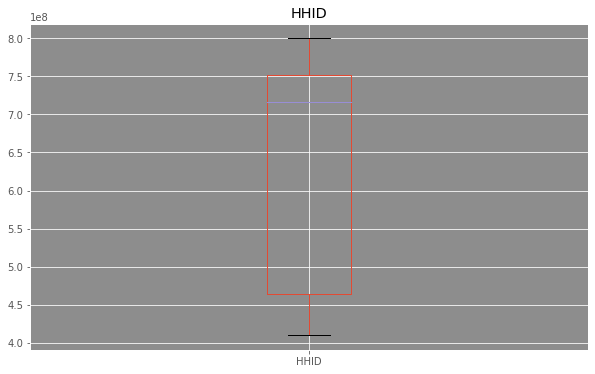

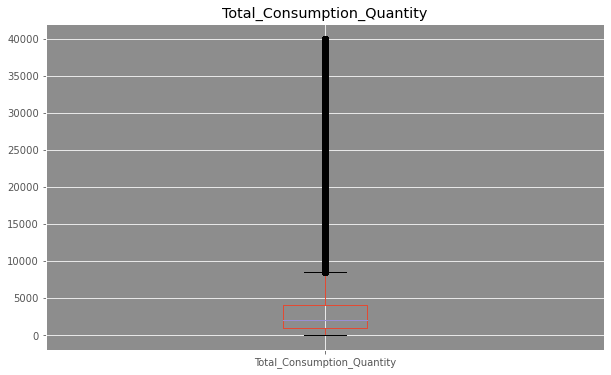

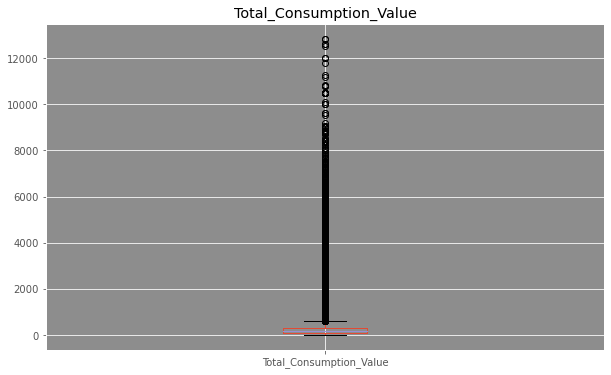

In [205]:
#Check Outliers
num_df = foodfilter.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    foodfilter.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [204]:
foodfilter = foodfilter.drop(foodfilter[foodfilter['Total_Consumption_Value'] >14000].index)
foodfilter = foodfilter.drop(foodfilter[foodfilter['Total_Consumption_Quantity'] >40000].index)

In [206]:
foodfilter.shape

(1258961, 5)

In [ ]:
##Exporting File
file_url2 = r'C:\Users\Lenovo\Documents\INDE DATA\FOODNSS68CLEAN.csv'
data.to_csv(file_url2,index = False)

# work on Household type
12	Rural : non-agriculture	18631	 22.3%
13	Rural : Regular wage/salary earning	3633	 4.3%
14	Rural : Casual labour in : agriculture	4949	 5.9%
15	Rural : non-agriculture	4267	 5.1%
19	Rural : others	1671	 2.0%
21	Urban : Self - employed	20925	 25.0%
22	Urban : regular wage/salary earning	9394	 11.2%
23	Urban : Casual labour	3151	 3.8%
29	Urban : Others

In [203]:
data['Household type'].unique()

array(['Rural : non-agriculture',
       'Rural : Self employed in : agriculture', 'Rural : others',
       'Rural : Regular wage/salary earning',
       'Rural : Casual labour in : agriculture',
       'Urban : Self - employed', 'Urban : regular wage/salary earning',
       'Urban : Others', 'Urban : Casual labour'], dtype=object)

In [204]:
data['Household type'] = data['Household type'].replace(['Rural : non-agriculture'],'Self_non-agriculture')
data['Household type'] = data['Household type'].replace(['Rural : Self employed in : agriculture'],'Self_agriculture')
data['Household type'] = data['Household type'].replace(['Rural : others'],'others')
data['Household type'] = data['Household type'].replace(['Rural : Regular wage/salary earning'],'Salary')
data['Household type'] = data['Household type'].replace(['Rural : Casual labour in : agriculture'],'Casual')
data['Household type'] = data['Household type'].replace(['Urban : Self - employed'],'Self_non-agriculture')
data['Household type'] = data['Household type'].replace(['Urban : regular wage/salary earning'],'Salary')
data['Household type'] = data['Household type'].replace(['Urban : Casual labour'],'Casual')
data['Household type'] = data['Household type'].replace(['Urban : Others'],'others')

In [205]:
#duplicate with columns: Whether owns any non-agricultural enterprise, then drop
data.drop(columns=['Whether owns any non-agricultural enterprise'], inplace=True)

In [206]:
## Missing data check
data.isna().sum()

Primary key - unique identifier for a household      0
Sector                                               0
State                                                0
Household size                                       0
Household type                                       0
Religion                                             0
Cast&class                                           0
Whether acquired any major durable goods             0
Household usual monthly consumer expenditure(Rs.)    8
dtype: int64

In [207]:
data = data.dropna()

In [208]:
data

,Primary key - unique identifier for a household,Sector,State,Household size,Household type,Religion,Cast&class,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.)
0,744471301,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,Islam,others,no,9000.0
1,744471302,Rural,JAMMU & KASHMIR,5,Self_non-agriculture,Islam,others,no,10000.0
2,744471303,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,others,Scheduled Castes,yes,100000.0
3,744472301,Rural,JAMMU & KASHMIR,8,Self_agriculture,Islam,Scheduled Tribes,no,4000.0
4,744472302,Rural,JAMMU & KASHMIR,9,Self_non-agriculture,Islam,Scheduled Tribes,no,7500.0
...,...,...,...,...,...,...,...,...,...
83595,924591102,Urban,A & N ISLANDS,5,Self_non-agriculture,Hinduism,others,yes,25000.0
83596,924591201,Urban,A & N ISLANDS,4,Self_non-agriculture,Christianity,others,yes,10000.0
83597,924591202,Urban,A & N ISLANDS,4,Self_non-agriculture,Hinduism,others,yes,8000.0
83598,924591301,Urban,A & N ISLANDS,5,Self_non-agriculture,Christianity,others,no,20000.0


In [209]:
## Data inconsistency check
data.describe()

,Primary key - unique identifier for a household,Household size,Household usual monthly consumer expenditure(Rs.)
count,8.359200e+04,83592.000000,8.359200e+04
mean,8.397048e+08,4.673844,9.913243e+03
std,1.072083e+08,2.229233,1.238500e+04
min,7.000011e+08,1.000000,1.000000e+00
25%,7.396013e+08,3.000000,5.000000e+03
50%,7.895813e+08,4.000000,8.000000e+03
75%,9.484115e+08,6.000000,1.200000e+04
max,9.999513e+08,40.000000,1.300000e+06


<Figure size 720x432 with 0 Axes>

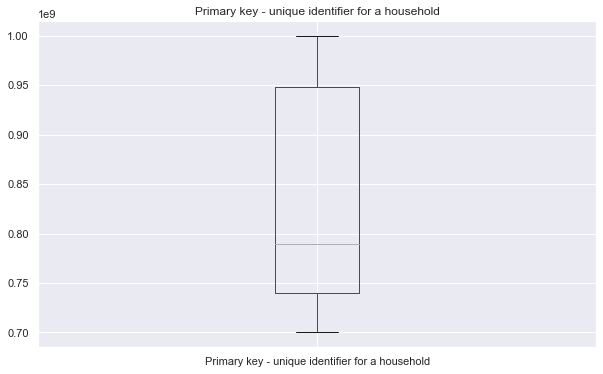

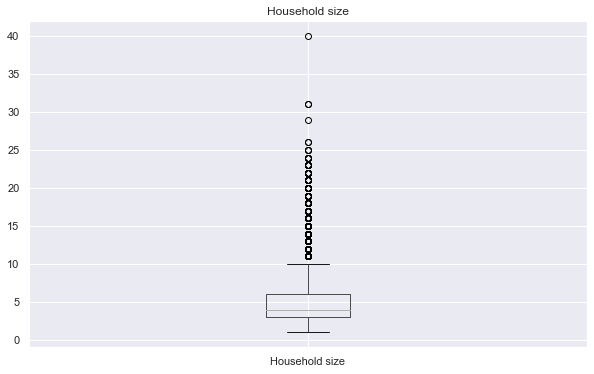

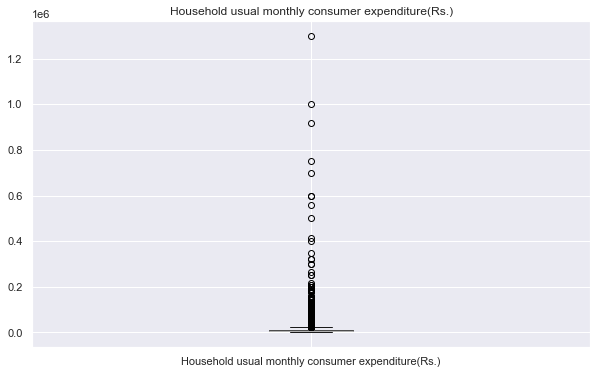

In [210]:
#Check Outliers
num_df = data.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [211]:
#We can see there are some outliers in Household size so we check these rows to knows how many is there
data[(data['Household size'] >20)].shape

(41, 9)

In [212]:
#We can see there are some outliers in Household size so we check these rows to knows how many is there
data[(data['Household size'] >20)].shape

#there is only 41 family on 83600: so we decide to drop them  ( but after concat other dataset)
data = data.drop(data[data['Household size'] >20].index)


In [213]:
#We drop outliers and keep under 400 000 roupies (around 5000 euros)
data = data.drop(data[data['Household usual monthly consumer expenditure(Rs.)'] >400000].index) 


In [214]:
data.shape


(83541, 9)

In [215]:
data

,Primary key - unique identifier for a household,Sector,State,Household size,Household type,Religion,Cast&class,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.)
0,744471301,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,Islam,others,no,9000.0
1,744471302,Rural,JAMMU & KASHMIR,5,Self_non-agriculture,Islam,others,no,10000.0
2,744471303,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,others,Scheduled Castes,yes,100000.0
3,744472301,Rural,JAMMU & KASHMIR,8,Self_agriculture,Islam,Scheduled Tribes,no,4000.0
4,744472302,Rural,JAMMU & KASHMIR,9,Self_non-agriculture,Islam,Scheduled Tribes,no,7500.0
...,...,...,...,...,...,...,...,...,...
83595,924591102,Urban,A & N ISLANDS,5,Self_non-agriculture,Hinduism,others,yes,25000.0
83596,924591201,Urban,A & N ISLANDS,4,Self_non-agriculture,Christianity,others,yes,10000.0
83597,924591202,Urban,A & N ISLANDS,4,Self_non-agriculture,Hinduism,others,yes,8000.0
83598,924591301,Urban,A & N ISLANDS,5,Self_non-agriculture,Christianity,others,no,20000.0


In [216]:
##Exporting File before encoding
file_url2 = r'C:\Users\Lenovo\Documents\INDE DATA\INDIACASTERELIGION.csv'
data.to_csv(file_url2,index = False)

In [217]:
import pandas as pd # creat before the name of database on mysql (projectindia, then execute)
import mysql.connector 
import sqlalchemy

database_username = 'root'
database_password = '123rout&'
database_ip       = '127.0.0.1'
database_name     = 'projectINDIA'

database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name), pool_recycle=1, pool_timeout=57600).connect()

data.to_sql(con=database_connection, name='region_caste', if_exists='append',chunksize=220)
database_connection.close()

ProgrammingError: (mysql.connector.errors.ProgrammingError) 1054 (42S22): Unknown column 'Cast&class' in 'field list'
[SQL: INSERT INTO region_caste (`index`, `Primary key - unique identifier for a household`, `Sector`, `State`, `Household size`, `Household type`, `Religion`, `Cast&class`, `Whether acquired any major durable goods`, `Household usual monthly consumer expenditure(Rs.)`) VALUES (%(index)s, %(Primary key - unique identifier for a household)s, %(Sector)s, %(State)s, %(Household size)s, %(Household type)s, %(Religion)s, %(Cast&class)s, %(Whether acquired any major durable goods)s, %(Household usual monthly consumer expenditureARs.Z)s)]
[parameters: ({'index': 0, 'Primary key - unique identifier for a household': 744471301, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_non-agriculture', 'Religion': 'Islam', 'Cast&class': 'others', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 9000.0}, {'index': 1, 'Primary key - unique identifier for a household': 744471302, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 5, 'Household type': 'Self_non-agriculture', 'Religion': 'Islam', 'Cast&class': 'others', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 10000.0}, {'index': 2, 'Primary key - unique identifier for a household': 744471303, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_non-agriculture', 'Religion': 'others', 'Cast&class': 'Scheduled Castes', 'Whether acquired any major durable goods': 'yes', 'Household usual monthly consumer expenditureARs.Z': 100000.0}, {'index': 3, 'Primary key - unique identifier for a household': 744472301, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 8, 'Household type': 'Self_agriculture', 'Religion': 'Islam', 'Cast&class': 'Scheduled Tribes', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 4000.0}, {'index': 4, 'Primary key - unique identifier for a household': 744472302, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 9, 'Household type': 'Self_non-agriculture', 'Religion': 'Islam', 'Cast&class': 'Scheduled Tribes', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 7500.0}, {'index': 5, 'Primary key - unique identifier for a household': 744472303, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 2, 'Household type': 'others', 'Religion': 'Islam', 'Cast&class': 'Scheduled Tribes', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 2500.0}, {'index': 6, 'Primary key - unique identifier for a household': 744491301, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_agriculture', 'Religion': 'Islam', 'Cast&class': 'others', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 12000.0}, {'index': 7, 'Primary key - unique identifier for a household': 744491302, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_agriculture', 'Religion': 'Islam', 'Cast&class': 'Scheduled Tribes', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 8000.0}  ... displaying 10 of 220 total bound parameter sets ...  {'index': 218, 'Primary key - unique identifier for a household': 744822101, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_non-agriculture', 'Religion': ' Hinduism', 'Cast&class': 'Scheduled Castes', 'Whether acquired any major durable goods': 'yes', 'Household usual monthly consumer expenditureARs.Z': 12000.0}, {'index': 219, 'Primary key - unique identifier for a household': 744822301, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 4, 'Household type': 'Self_non-agriculture', 'Religion': ' Hinduism', 'Cast&class': 'others', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 8000.0})]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [224]:
data ['Cast&class'].value_counts()

Other  Backward Classes    33418
others                     26402
Scheduled Castes           12300
Scheduled Tribes           11421
Name: Cast&class, dtype: int64

<AxesSubplot:>

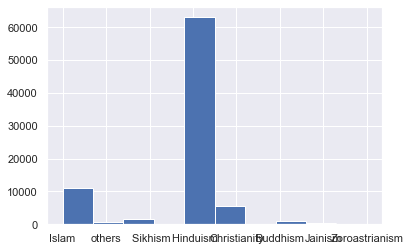

In [225]:
data ['Cast&class'].value_counts()

data ['Religion'].hist()

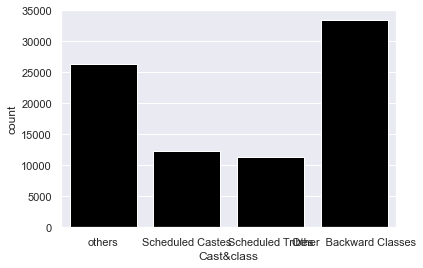

<AxesSubplot:>

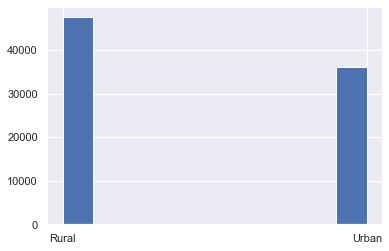

In [226]:
data ['Cast&class'].value_counts()

data ['Religion'].hist()

sns.countplot(x='Cast&class', data=data, color='black')
plt.show()

data ['Sector'].hist()

,Primary key - unique identifier for a household,Household size,Household usual monthly consumer expenditure(Rs.)
Religion,,,
Hinduism,8.372827e+08,4.560610,9665.672076
Sikhism,8.278962e+08,4.881782,14147.581953
Buddhism,8.228285e+08,4.513636,8821.369318
Christianity,8.455780e+08,4.648266,10637.049717
Islam,8.508517e+08,5.218705,9424.208091
Jainism,9.208409e+08,4.849727,18576.040984
Zoroastrianism,8.851664e+08,3.550000,16254.250000
others,8.404869e+08,4.962779,8711.905707


,Primary key - unique identifier for a household,Household size,Household usual monthly consumer expenditure(Rs.)
Cast&class,,,
Other Backward Classes,8.322020e+08,4.735083,9136.468909
Scheduled Castes,8.195314e+08,4.646016,7799.928537
Scheduled Tribes,8.177473e+08,4.773838,8457.462044
others,8.680636e+08,4.536550,12202.976820


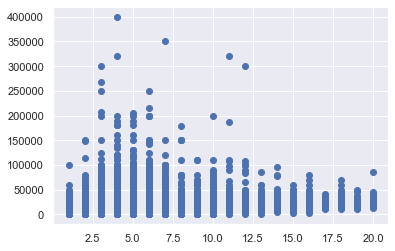

In [229]:
data ['Cast&class'].value_counts()

data ['Religion'].hist()

sns.countplot(x='Cast&class', data=data, color='black')
plt.show()

data ['Sector'].hist()

data_group = data.groupby(['Religion']).mean()
data_group 

data_group = data.groupby(['Cast&class']).mean()
data_group 


fig, ax = plt.subplots()

plt.scatter(data=data, x='Household size', y='Household usual monthly consumer expenditure(Rs.)', cmap='viridis')

plt.show()

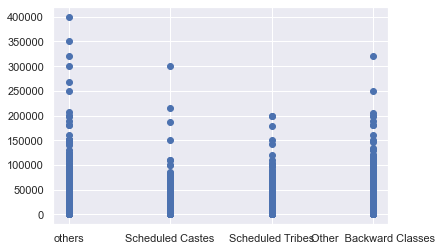

In [231]:
data_group = data.groupby(['Religion','Cast&class']).mean()
data_group 

Primary key - unique identifier for a household  \
Religion       Cast&class                                                                 
 Hinduism      Other  Backward Classes                                     8.273076e+08   
               Scheduled Castes                                            8.204435e+08   
               Scheduled Tribes                                            7.885579e+08   
               others                                                      8.757628e+08   
 Sikhism       Other  Backward Classes                                     8.217615e+08   
               Scheduled Castes                                            7.950382e+08   
               Scheduled Tribes                                            8.555626e+08   
               others                                                      8.532877e+08   
Buddhism       Other  Backward Classes                                     8.228910e+08   
               Scheduled Castes                                            8.269849e+08   
               Scheduled Tribes                                            8.209604e+08   
               others                                                      8.188885e+08   
Christianity   Other  Backward Classes                                     8.372085e+08   
               Scheduled Castes                                            8.110941e+08   
               Scheduled Tribes                                            8.554577e+08   
               others                                                      8.097627e+08   
Islam          Other  Backward Classes                                     8.553674e+08   
               Scheduled Castes                                            8.426015e+08   
               Scheduled Tribes                                            8.324429e+08   
               others                                                      8.476278e+08   
Jainism        Other  Backward Classes                                     8.768882e+08   
               Scheduled Castes                                            7.492918e+08   
               Scheduled Tribes                                            8.339543e+08   
               others                                                      9.324553e+08   
Zoroastrianism Other  Backward Classes                                     9.783913e+08   
               Scheduled Tribes                                            9.059804e+08   
               others                                                      8.361672e+08   
others         Other  Backward Classes                                     9.187890e+08   
               Scheduled Castes                                            8.097945e+08   
               Scheduled Tribes                                            8.314615e+08   
               others                                                      8.939523e+08   

                                        Household size  \
Religion       Cast&class                                
 Hinduism      Other  Backward Classes        4.614950   
               Scheduled Castes               4.633713   
               Scheduled Tribes               4.601611   
               others                         4.429895   
 Sikhism       Other  Backward Classes        5.146789   
               Scheduled Castes               4.931857   
               Scheduled Tribes               4.333333   
               others                         4.752137   
Buddhism       Other  Backward Classes        4.551020   
               Scheduled Castes               4.485915   
               Scheduled Tribes               4.501066   
               others                         4.666667   
Christianity   Other  Backward Classes        3.946875   
               Scheduled Castes               4.452229   
               Scheduled Tribes               4.924771   
               others                         3.86